In [14]:
import requests
import cdsapi
import sys
import os
cp = '/home/jupyter-gabriel/' #'I:/My Drive/'
sys.path.append(cp + "projects/suyana")
from scripts.utils.functions import *

# Data primary path
dpp = 'suyana/'
# Data inputs path
dip = 'suyana/inputs/'
# Data features path
dfp = 'suyana/features/'
# Data outputs path
dop = 'suyana/outputs/'
# Data reports path
drp = 'suyana/reports/'
# Data models path
dmp = 'suyana/models/'
# Data displays path
ddp = 'suyana/displays/'
# Data geometries path
dgp = 'suyana/geometries/'

# List of years to loop through

In [2]:
years = np.arange(2002,2025,1).tolist()

dataset = "reanalysis-era5-land"

base_request = {
    "variable": ["volumetric_soil_water_layer_1"],
    "month": [
        "01", "02", "03", "04", "05", "06",
        "07", "08", "09", "10", "11", "12"
    ],
    "day": [
        "01", "02", "03", "04", "05", "06",
        "07", "08", "09", "10", "11", "12",
        "13", "14", "15", "16", "17", "18",
        "19", "20", "21", "22", "23", "24",
        "25", "26", "27", "28", "29", "30", "31"
    ],
    "time": [
        #"00:00", "01:00", "02:00", "03:00", "04:00", "05:00",
        #"06:00", "07:00", 
        "08:00", 
        #"09:00", "10:00", "11:00",
        #"12:00", "13:00", "14:00", "15:00", "16:00", "17:00",
        #"18:00", "19:00", "20:00", "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "area": [-14.8, -64.3, -18.9, -60.7]

}

# Loop through each year and retrieve data

In [3]:
client = cdsapi.Client()

2025-01-28 22:22:20,054 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-01-28 22:22:20,056 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


# Retrieve and download data

In [15]:
if not os.path.exists(dip):
    os.makedirs(dip)
if not os.path.exists(dfp):
    os.makedirs(dfp)
if not os.path.exists(dop):
    os.makedirs(dop)
if not os.path.exists(drp):
    os.makedirs(drp)
if not os.path.exists(dmp):
    os.makedirs(dmp)
if not os.path.exists(ddp):
    os.makedirs(ddp)
if not os.path.exists(dgp):
    os.makedirs(dgp)

In [ ]:
for year in [2012]:
    print(f"Requesting data for year {year}...")
    request = base_request.copy()
    request["year"] = [year]  # Update year in the request

    output_filename = dip + "drought_soilwater{year}.nc"

    client.retrieve(dataset, request).download(output_filename)
    print(f"Data for {year} saved as {output_filename}")

print("All requests completed.")

Requesting data for year 2012...


2025-01-28 22:23:01,521 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-28 22:23:01,521 INFO Request ID is db468cc0-2ab4-4390-88fb-b77296e932e2
2025-01-28 22:23:01,817 INFO status has been updated to accepted
2025-01-28 22:23:12,027 INFO status has been updated to running
2025-01-28 22:23:17,329 INFO status has been updated to accepted
2025-01-28 22:23:25,172 INFO status has been updated to running
2025-01-28 22:24:58,775 INFO status has been updated to successful
                                                                                         

Data for 2012 saved as I:/My Drive/suyana/data/capacity/soilwater{year}.nc
All requests completed.


In [9]:
ds_era2011 = xr.open_dataset(dip + 'drought_soilwater_2011.nc')
ds_era2012 = xr.open_dataset(dip + 'drought_soilwater_2012.nc')
ds_era = xr.concat([ds_era2011, ds_era2012], dim='valid_time')
ds_era = ds_era.rename({
    'valid_time': 'time',
    'longitude': 'lon',
    'latitude': 'lat',
    'swvl1': 'swc'
}).drop_vars(['number', 'expver'])
ds_era

<xarray.Dataset> Size: 5MB
Dimensions:  (time: 731, lat: 42, lon: 37)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2011-01-01T08:00:00 ... 2012-12-31T08:...
  * lat      (lat) float64 336B -14.8 -14.9 -15.0 -15.1 ... -18.7 -18.8 -18.9
  * lon      (lon) float64 296B -64.3 -64.2 -64.1 -64.0 ... -60.9 -60.8 -60.7
Data variables:
    swc      (time, lat, lon) float32 5MB 0.5081 0.5152 0.5005 ... 0.3249 0.3312
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-21T15:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds_era.to_netcdf(dip + 'drought_soilwater_2011_2012.nc')

In [ ]:
# Select the specific lon and lat by label (or by position) 
lon_label = -63.7
lat_label = -16.2 
# Select the data at the specific location 
ds_location = ds_era.sel(lon=lon_label, lat=lat_label, method='nearest') 
# Plotting 
plt.figure(figsize=(10, 6)) 
plt.plot(ds_location.time, ds_location.swc, label='swc', color='blue') 
plt.xlabel('Time') 
plt.ylabel('Soil Water Content') 
plt.title(f'Soil Water Content at lon {lon_label}, lat {lat_label}') 
plt.legend() 
plt.show()

# Interpolate data

In [ ]:
lat_fine = np.arange(ds_era.lat.min(), ds_era.lat.max() + 0.01, 0.01)
lon_fine = np.arange(ds_era.lon.min(), ds_era.lon.max() + 0.01, 0.01)
# Interpolate to the finer resolution
ds_interp = ds_era.interp(lat=lat_fine, lon=lon_fine, method="linear")

# Inspect the interpolated data
print(ds_interp)

# Boundaries de cantones

In [ ]:
import xarray as xr

In [17]:
df_cantones = gpd.read_file(dgp + 'drought_canton_polygons.gpkg')

<Axes: >

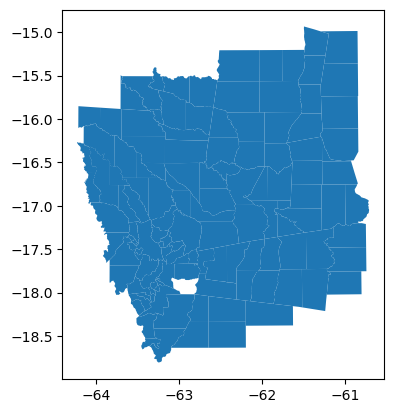

In [18]:
df_cantones[df_cantones['id_canton']!=197].plot()

In [19]:
df_cantones.total_bounds

array([-64.23328368, -18.80619214, -60.71554795, -14.93425709])

In [23]:
ids_orig = df_cantones.id_canton.unique().tolist()
ids_orig

[14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 27,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 70,
 71,
 72,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 104,
 105,
 106,
 107,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 155,
 158,
 159,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 180,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 217,
 218,
 220,
 223,
 235,
 236,
 237,
 238,
 283,
 284,
 287,
 288]

In [19]:
files  = os.listdir(cp + 'projects/suyana/data/capacity/planet_polygons/')
for f in files:
    os.rename(cp + 'projects/suyana/data/capacity/planet_polygons/' + f, dgp + f)

In [21]:
import os
files = os.listdir(dgp)
files = [f for f in files if f.endswith(".shp") and f.startswith("canton")]
id_canton = [files[i].split("_")[1].split(".")[0] for i in range(len(files))]
id_canton = [int(el) for el in id_canton]

In [25]:
for id in ids_orig:
    if id not in id_canton:
        print(id)

14
15
16
17
18
19
20
21
22
27
31
32
33
34
35
36
37
38
39
40
41
42
44
46
47
48
71
77
78
79
104
107
123
124
130
131
135
136
137
138
139
140
141
142
155
159
180
186
187
188
193
197
200
201
203
204
212
217
223
235
236
238
283
284
287
288
